In [7]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using LaTeXStrings
using Base.Threads
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("../Scripts/Impurity.jl")
includet("../Scripts/Torus_Distance.jl")
includet("KM_Model.jl")

In [8]:
Nx = 6
Ny = 6
p = 1
q = 3
pn = 3
U = 1

N_Site = Nx*Ny
N = N_Site
t = 1
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

V = 1
Vrand = 0

0

In [9]:
matrix = KM(Nx, Ny, t, p, q);

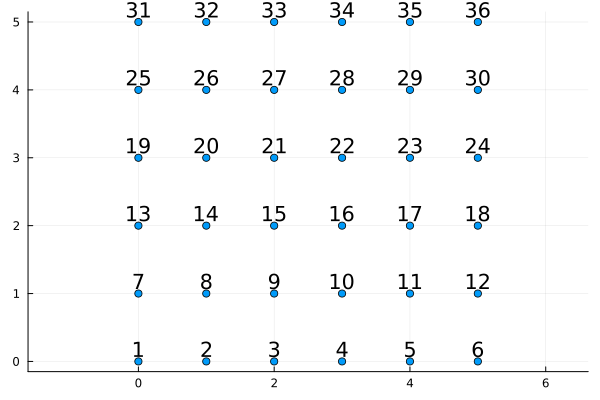

In [10]:
co, lat_plot = plot_square_lattice(N_Site, Nx, Ny)
lat_plot

In [11]:
NPin = 2
V0 = [V,V]; Imp_Site = [21, 1]
Impurity_Data = Impurity(V0, Imp_Site);

In [12]:
Degeneracy, nu_eff = ground_degeneracy(Nx, Ny, p, q, NPin, pn)
ParameterInfo(NPin, pn, Nx, Ny, p, q);


 Lattice Size: 6x6
 The Number of Flux per Unit-Cell (ϕ) = 1//3
 Filling Fraction (ν) = 1//4 (The Number of Quasiholes = 6)
 The Number of Flux Quanta = 10 (Delocalised Number = 4)
The Total Number of Particle = 3
 The Effective Filling = 3//10
The Number of Ground State Degeneracy = 50


In [ ]:
HardCore = false
HHubbard, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
basis_cut_sp = NLevelBasis(Cut_Off)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb)

Impurity_H = Imp_H(Sub_Number_MB_Operator_List, Impurity_Data, Vrand)

Total_H = HHubbard + Impurity_H;

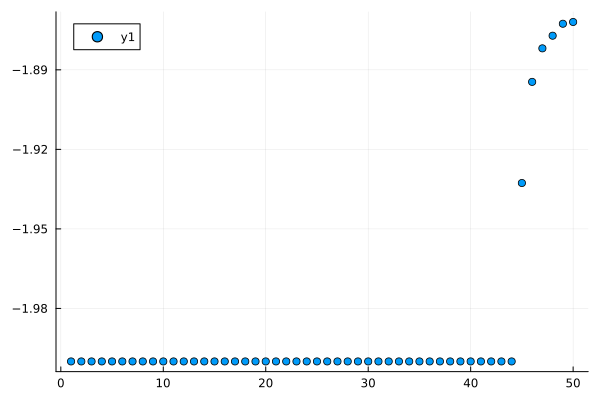

In [9]:
ϵ, psi = eigenstates(dense(Total_H))
scatter(ϵ[1:50])

In [12]:
avg_density = Get_Avg_Density(Nx, Ny, Degeneracy, N_Site, Sub_Number_MB_Operator_List, basis_cut_mb, psi);

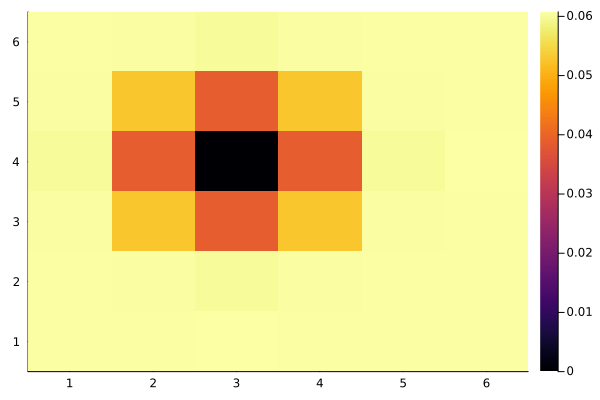

In [13]:
heatmap(avg_density')

In [21]:
# REFERENCE PARTICLE DENSITY (PARTICLE DENSITY WITHOUT NO PIN)
ref_par_density = (pn*(p/q))/(NPhi0-NPin)

0.0606060606060606

In [22]:
coords = get_coords_square(Nx, Ny)
Radius = 2; ref_site = 21
Inner_Sites(Radius,ref_site,coords)

13-element Vector{Any}:
  9
 14
 15
 16
 19
 20
 21
 22
 23
 26
 27
 28
 33

In [23]:
nu_eff

0.18181818181818182

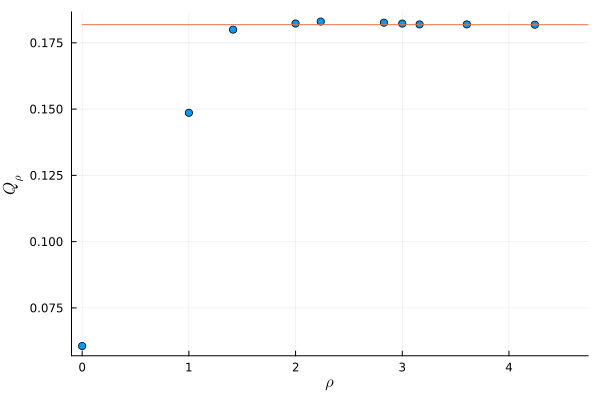

In [28]:
radius_list = get_radii(coords, ref_site, N)
charge_dep = charge_depletion_prof(radius_list,ref_site,coords,ref_par_density,avg_density)
scatter(radius_list, charge_dep)
x=0;g(x)=nu_eff
plot!(g, x, length(radius_list), xlabel=L"\rho", ylabel=L"Q_{\rho}", xlim=(-0.1,maximum(radius_list)+0.5), legend=false) 